**Important note:** GitHub is not able to render certain interactive elements in this notebook (the pandas-profiling HTML report, and HTML text formatting used throughout). Please view this notebook through the jupyter nbviewer:<br><br>
https://nbviewer.jupyter.org/github/yonkman/data-projects/blob/master/AI%20Wine%20Classification.ipynb

## Neural Network Classification of Wine Cultivar Using pandas and scikit-learn

The goal of this notebook is to serve as a reference script for the creation of a simple artificial neural network of [multi-layer perceptron](https://skymind.ai/wiki/multilayer-perceptron) (MLP) to determine the origin of a wine given its chemical profile of 13 features. [This dataset](https://archive.ics.uci.edu/ml/datasets/Wine) was chosen for its popularity in AI evaluation: the source has been accessed over 1 million times, and is a common first choice for implementing new classification algorithms due to the strong but complex and nonlinear relationship between a wine's chemical profile (feature vector) and its cultivar.

In [10]:
import numpy as np
import pandas as pd
import matplotlib 

wine = pd.read_csv('wines.csv', dtype='float64', 
                   names=["Cultivar", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", 
                          "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", 
                          "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

# source: https://archive.ics.uci.edu/ml/datasets/Wine

print(wine.shape)
wine.head()

(178, 14)


,Cultivar,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


We have 178 records of wine profiles. All were cultivated in the same region of Italy, but each is classified by one of three cultivars $C \in{ [1, 2, 3]}$
<br><br>
Our goal is to train a neural network using a subset of this data, then test its accuracy on what remains. If the model performs well on this test data, we gain confidence in its efficacy on future, unknown records from the same universe.
<br><br>
We can take a quick glance at what our feature vector looks like with the [pandas <font face="courier new">describe()</font> method:](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [2]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivar,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Or, more visually, dive in a little deeper to see correlation matrices and a histogram of each feature with the [<font face="courier new">pandas_profiling</font>](https://github.com/pandas-profiling/pandas-profiling) tool:

In [3]:
import pandas_profiling
pandas_profiling.ProfileReport(wine)

Number of variables,14
Number of observations,178
Total Missing (%),0.0%
Total size in memory,19.5 KiB
Average record size in memory,112.4 B
Numeric,14
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


This open-source tool has many advantages for quickly exploring new data before analysis, including:
* immediate and broadly useful plots
* flagging features with missing entries or unexpected data types
* automatic detection of any strong correlations between features, which allows dimensionality reduction by removing redundancy<br>

It also tells us the frequency of each cultivar in the data, which would warn us if any were significantly under or overrepresented:<br><br>
<center>
|C<sub>1</sub>|: 59 records<br>
|C<sub>2</sub>|: 71 records<br>
|C<sub>3</sub>|: 48 records<br><br></center>

From the correlation matrices, we can quickly spot a few features that correlate strongly (either negatively or positively) with C. It might be worth plotting a few of these features to see if any are enough to predict C on their own.

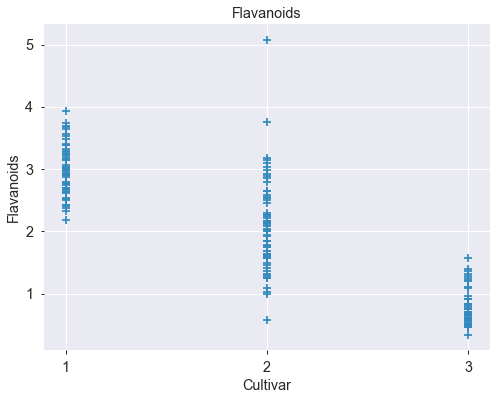

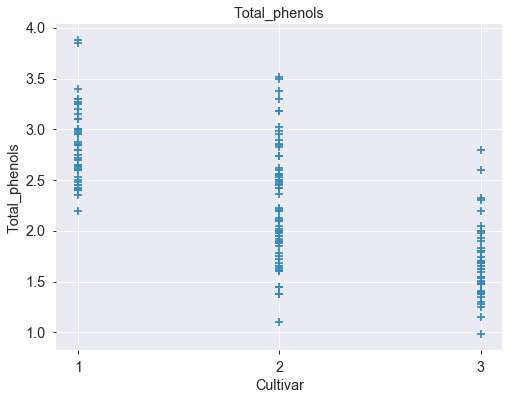

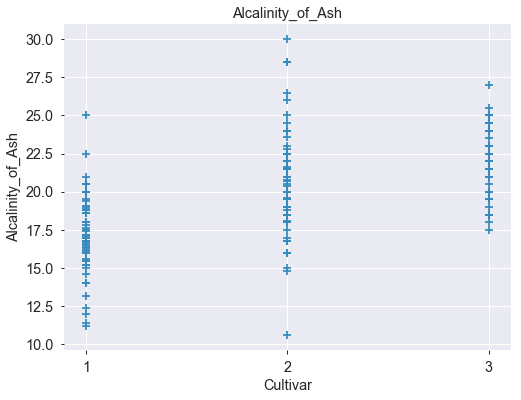

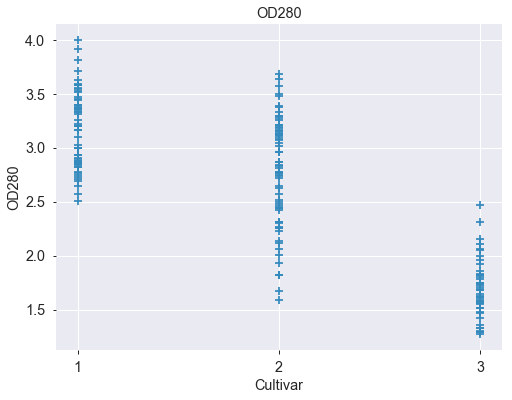

In [4]:
%matplotlib inline
import matplotlib.pylab as plt

params = {'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

matplotlib.pylab.rcParams.update(params)

plt.style.use('fast')
# print(plt.style.available)

plotindices = ['Flavanoids', 'Total_phenols', 'Alcalinity_of_Ash', 'OD280']

for y in plotindices:
    wine.plot(kind='scatter', x='Cultivar', y=y, title=y, s=50, xticks=(1,2,3), marker='+')
    # print(wine['Cultivar'].corr(wine[y]))


No dice. There may be strong correlation, but there's also a lot of overlap of each feature between cultivars.<br><br>

This is an ideal application for a classification artificial neural network. We'll start by defining our inputs and outputs.

In [5]:
feature_vector = wine.drop('Cultivar', axis=1)
target = wine['Cultivar']

Now, let's split our data 65:35 between a training set and a testing set, using the scikit-learn function <font face="courier new">[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)</font>:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_vector, target, test_size=0.35)

print('training records:\t' + str(len(X_train)))
print('test records:\t\t' + str(len(X_test)))

training records:	115
test records:		63


<font face="courier new">train_test_split</font> attempts to split the data into two samples with each representative of the whole, so the metrics given by pandas<font face="courier new">.describe()</font> will look similar whether it is called on *X_train*, *X_test*, or *feature_vector*.<br><br>

For our MLP to work properly, we need to scale each input feature to have a mean of 0 and variance of 1, which is accomplished with [scikit-learn's <font face="courier new">StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)<font>. 

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformation to all data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# pd.DataFrame(data=X_train).describe().transpose()
# shows mean~=0; std~=1

Now we can initialize and train the MLP with this normalized feature vector, using [sklearn's <font face="courier new"> MLPClassifier</font>](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html):

In [8]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(15,15,15),max_iter=1000,tol=0.0001)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

How well does our model perform on the test set?

In [9]:
predictions = mlp.predict(X_test)

correct = sum(predictions == y_test)
incorrect = sum(predictions != y_test)

print(str(correct) + ' records correctly classified')
print(str(incorrect) + ' misclassifications')

62 records correctly classified
1 misclassifications


Success!